   # Computing wave optics amplification factor
   ## Type 1 embedded lens system
The following example computes the wave optics amplification factor for a type 1 embedded lens system which consists of a macrolens of galaxy and a microlens of stellar object.

In [1]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect_left

import sys
import os
path = os.getcwd()
dir = os.path.abspath(os.path.join(path, os.pardir))
sys.path.append(dir)
import amplification_factor.amplification_factor as af

import lensinggw.constants.constants as const 
G = const.G  # gravitational constant [m^3 kg^-1 s^-2]
c = const.c  # speed of light [m/s]
M_sun = const.M_sun  # Solar mass [Kg]

from argparse import Namespace

In [2]:
df = 0.25
textendmax = 1/df
tlength = .13
textend = textendmax-tlength
args = {'LastImageT': .02, 'TExtend': textend, 'mu': 11., 'TimeMax': 1, 'TimeMin': .1, 'TimeLength': tlength, 'Timg': 118211.81107161, 'TimeStep': 1e-5, 'Winfac': 1.}
args = Namespace(**args)

In [3]:
# initialize the parameters

mL1 = 1 * 1e10 # Galaxy lens's mass in solar mass
mL2 = 100 # Microlens's mass
mtot = mL1 + mL2
mLc = 10

# Define the redshifts of lens and source
zL = 0.5
zS = 1.0

from lensinggw.utils.utils import param_processing

# Einstein radii of lenses
thetaE1 = param_processing(zL, zS, mL1)
thetaE2 = param_processing(zL, zS, mL2)
thetaE = param_processing(zL, zS, mtot)
thetaEc = param_processing(zL, zS, mLc)

# Binary positions on the source plane
y0, y1 = 0.1, 0 # In Einstein raidus
beta0, beta1 = y0 * thetaE, y1 * thetaE

# Lens positions 
eta10, eta11 = 0, 0

Compute the macroimage positions from the given parameters using lensingGW package.

In [4]:
# Compute the image positions
lens_model_list = ['SIS']
kwargs_sis_1 = {'center_x': eta10, 'center_y': eta11, 'theta_E': thetaE1}
kwargs_lens_list = [kwargs_sis_1]

from lensinggw.solver.images import microimages

solver_kwargs = {'SearchWindowMacro': 10 * thetaE1,
                 'SearchWindow': 5 * thetaE2,
                 'OverlapDistMacro': 1e-17,
                 'OnlyMacro': True,
                 'Verbose' : True}

MacroImg_ra, MacroImg_dec, pixel_width = microimages(source_pos_x=beta0,
                                                     source_pos_y=beta1,
                                                     lens_model_list=lens_model_list,
                                                     kwargs_lens=kwargs_lens_list,
                                                     **solver_kwargs)

/mnt/c/Users/simon/microlensing/venv/lib/python3.10/site-packages/lensinggw-1.0.0-py3.10.egg/lensinggw/solver/images.py:107: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/mnt/c/Users/simon/microlensing/venv/lib/python3.10/site-packages/lensinggw-1.0.0-py3.10.egg/lensinggw/solver/images.py:107: SyntaxWarning: "is" with a literal. Did you mean "=="?
/mnt/c/Users/simon/microlensing/venv/lib/python3.10/site-packages/lensinggw-1.0.0-py3.10.egg/lensinggw/solver/images.py:108: SyntaxWarning: "is" with a literal. Did you mean "=="?
/mnt/c/Users/simon/microlensing/venv/lib/python3.10/site-packages/lensinggw-1.0.0-py3.10.egg/lensinggw/solver/images.py:117: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/mnt/c/Users/simon/microlensing/venv/lib/python3.10/site-packages/lensinggw-1.0.0-py3.10.egg/lensinggw/solver/images.py:117: SyntaxWarning: "is" with a literal. Did you mean "=="?
/mnt/c/Users/simon/microlensing/venv/lib/python3.10/site-packages/lensinggw-1.0.0-py3.10.egg


---- Will perform only the macromodel analysis ----

---- Solver settings ----

The macromodel analysis will be performed with the following settings:

OnlyMacro         --> True
Scaled            --> False
SearchWindowMacro --> 8.052888061582412e-06
PixelsMacro       --> 1000
PrecisionLimit    --> 1e-20
OverlapDistMacro  --> 1e-17
NearSource        --> False
Optimization      --> False
Verbose           --> True


---- Macromodel analysis ----

Interesting regions of the first grid (no iteration yet):

ra:
[-7.20733481e-07  8.81791243e-07]
dec:
[-4.02644403e-09 -4.02644403e-09]
pixel_width:
8.052888061582012e-09


Iteration # 0

Pixels to iterate over, RAs:
[-7.207334811089802e-07, 8.817912431459198e-07]
Pixels to iterate over, DECs:
[-4.026444030789735e-09, -4.026444030789735e-09]
Pixels to iterate over, source displacements:
[4.041569964298695e-09, 4.033208730674185e-09]



Pixel size of the last iteration: 5.36859204105418e-10




MACROIMAGES

ra: [-7.24759925e-07  8.85817687e-07]

Input the position and the mass of the microlens and compute the microimages.

potential [5.83641055e-13 7.13339068e-13]
prefactor 4.557193381334929e+17
[3.24245031e-13 3.24245031e-13]


Integrating...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:19<00:00, 13.45it/s]


[0.00000000e+00 3.38382655e-11 6.76764200e-11 ... 4.39794940e-07
 4.39828778e-07 4.39862616e-07] [0.30055471 3.31900907 3.31900907 ... 3.3273066  3.36648934 3.26092641]
[0.00000000e+00 6.20255825e-01 1.24051165e+00 ... 3.14157094e+05
 3.14157715e+05 3.14158335e+05] [ 0.         -0.j          2.2110635  +2.21111486j
  3.53768924 +0.88445696j ... 18.02765784+33.72015679j
 14.52063279+38.99994262j  9.41146652+42.91051267j]


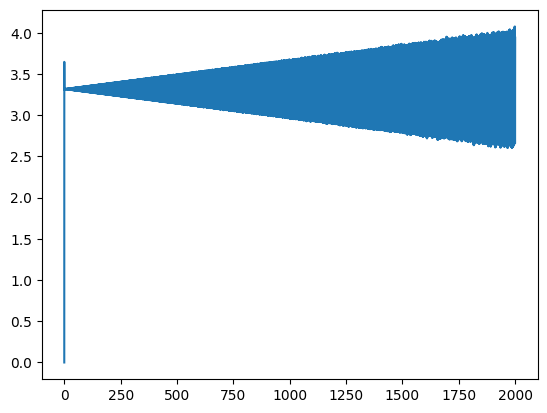

In [6]:
# Microlensing around type 1 image

from lensinggw.utils.utils import TimeDelay, magnifications
mus = magnifications(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list)

# Locate the type 1 image by finding zero time delay image.
TDS = TimeDelay(MacroImg_ra, MacroImg_dec,
                beta0, beta1,
                zL, zS,
                lens_model_list, kwargs_lens_list)

imindex = np.where(TDS==0)[0][0] # The corresponding image index
mu = mus[imindex] # The corresponding macromagnification of the image

from lenstronomy.LensModel.lens_model import LensModel
lens_model_complete = LensModel(lens_model_list=lens_model_list)
T = lens_model_complete.fermat_potential

# Define T0 to be where the integration starts
T0 = thetaE ** (-2) * T(MacroImg_ra[imindex], MacroImg_dec[imindex], kwargs_lens_list, beta0, beta1)
Tscale = 4 * (1 + zL) * mtot * M_sun * G / c ** 3

kwargs_wolensing = {'source_pos_x': beta0,
                    'source_pos_y': beta1,
                    'theta_E': thetaE,
                    'LastImageT': .02/Tscale,
                    'TExtend': 10./Tscale,
                    'Tbuffer': 0.,
                    'mu': mu}

kwargs_integrator = {'InputScaled': False,
                     'PixelNum': 30000,
                     'PixelBlockMax': 2000,
                     'WindowSize': 210*thetaEc,
                     'WindowCenterX': MacroImg_ra[imindex],
                     'WindowCenterY': MacroImg_dec[imindex],
                     'TimeStep': 1e-5/Tscale, 
                     'TimeMax': T0 + 1./Tscale,
                     'TimeMin': T0 - .1/Tscale,
                     'TimeLength': 0.13/Tscale,
                     'ImageRa': [],
                     'ImageDec': [],
                     'T0': T0,
                     'Tscale': Tscale}

ws, Fws = af.amplification_factor_fd(lens_model_list, args, kwargs_lens_list, **kwargs_wolensing,**kwargs_integrator) # Output in angular frequency

plt.plot(ws/(2*np.pi), np.abs(Fws))

np.savetxt('./test_ws_100.00000_1.00000.txt', ws)
np.savetxt('./test_Fws_100.00000_1.00000.txt', Fws)

## Plotting the amplifcation factor

In [15]:
ws = np.loadtxt('./test_ws_100.00000_1.00000.txt')
#Fws = np.loadtxt('./test_Fws_100.00000_1.00000.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})
Fws = np.loadtxt('./test_Fws_100.00000_1.00000.txt')
print(Fws[-1])

from scipy.fft import fftfreq
from scipy.fftpack import fft
def iwFourier(ts, Ft):
    num = len(ts)
    dt = ts[1] - ts[0]
    ws = 2 * np.pi * fftfreq(num, dt)[:num // 2]
    Fw = np.conjugate(fft(Ft)[:num // 2] * (1.j) * ws * dt)

ws, Fws = iwFourier(ws, Fws)
    
fs = ws/(2*np.pi)

fig, ax = plt.subplots()
i = bisect_left(fs,2000) # LIGO sensitivity range
ax.plot(fs[:i], Fa_fil[:i], linewidth=1)

2.0315969810691971e-16


TypeError: cannot unpack non-iterable NoneType object